In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
import os
color_sns = sns.cubehelix_palette(8, start=.5, rot=-.75)

In [13]:
path = os.getcwd()
base = path.split('/')[:-2]
base_path = '/'.join(base)


In [31]:
def plot_fsst(cr, ra, leco_cr, leco_ra, dataset, setsize):
    plt.figure(figsize=(4, 3))
    plt.plot(ra, cr,marker='v', label = 'FSST', c='seagreen',ms=8, ls='--')
#     plt.plot(ra, cr, c='seagreen')
    plt.scatter(leco_ra, leco_cr, label = 'LeCo', c='sandybrown',s=50)
    for i in range(len(leco_ra)):
        plt.annotate(setsize[i], xy = (leco_ra[i], leco_cr[i]), xytext = (leco_ra[i]-14+i*10, leco_cr[i]-10), fontsize=12)
    plt.ylim([0, max(cr)+5])
    plt.xlim([0, max(ra)+10])
    plt.xlabel('Random Access(ns)',fontsize=15)
#     plt.ylabel('Compression Ratio(%)',fontsize=15)
    plt.title(dataset,fontsize=20)
#     plt.legend(fontsize=16)
    plt.tight_layout()
    plt.savefig('String_'+str(dataset)+'.pdf',dpi=500, transparent=True)
    plt.show()

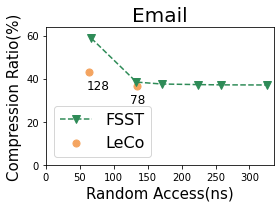

In [19]:
# cr= [58.786,40.2885,38.3979,37.5044,37.2284,37.1105,37.0537]
# ra = [66.7324,118.476,133.434,170.754,224.739,258.544,325.564]
cr= [58.786,38.3979,37.5044,37.2284,37.1105,37.0537]
ra = [66.7324,133.434,170.754,224.739,258.544,325.564]
leco_cr=[36.68, 42.94]
leco_ra = [134.3327,62.982776]
plot_fsst(cr,ra, leco_cr, leco_ra, 'Email', [78,128])

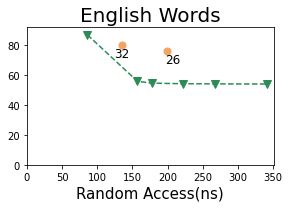

In [21]:
# cr= [87.0016,58.7564,55.9173,54.6782,54.2841,54.182,54.0897]
# ra = [85.9518,142.559,157.103,177.231,221.599,267.004,340.661]
cr= [87.0016,55.9173,54.6782,54.2841,54.182,54.0897]
ra = [85.9518,157.103,177.231,221.599,267.004,340.661]
leco_cr=[80.29,76.29]
leco_ra = [134.67098,199.42741]
plot_fsst(cr,ra, leco_cr, leco_ra, 'English Words',[32, 26])

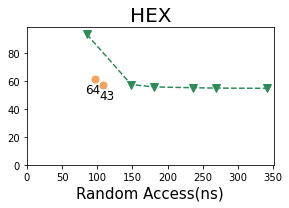

In [32]:
# cr= [93.1003,60.6372,57.2789,55.5998,55.0403,54.7603,54.5923]
# ra = [85.1523,112.309,148.255,180.323,236.128,268.327,340.673]
cr= [93.1003,57.2789,55.5998,55.0403,54.7603,54.5923]
ra = [85.1523,148.255,180.323,236.128,268.327,340.673]
leco_cr=[61.44, 57.07]
leco_ra = [96.928406,107.6889]
plot_fsst(cr,ra, leco_cr, leco_ra, 'HEX',[64, 43])

In [3]:
methods = ['FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost']

In [5]:
fix_int = pd.read_csv(base_path+'/benchmark/fix_int_benchmark_intel.log')

In [6]:
fix_int_filter = fix_int.loc[fix_int['method'].isin(methods)]

In [7]:
auto_int = pd.read_csv(base_path+'/benchmark/auto_int_benchmark_intel.log')

In [8]:
total = pd.concat([fix_int_filter, auto_int],axis = 0)

In [9]:
piecewise_fix_op_max = total.loc[total['method'].isin(['piecewise_fix_op_max'])]
leco_cost = total.loc[total['method'].isin(['leco_cost'])]
FOR_my = total.loc[total['method'].isin(['FOR_my'])]
aim_datasets = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','books_200M_uint32.txt','fb_200M_uint64','movieid.txt','house_price.txt','wiki_200M_uint64']
cr_enhance = []
for name in aim_datasets:
    leco_cr = float(piecewise_fix_op_max.loc[piecewise_fix_op_max['dataset']==name]['cr'])
    leco_cost_cr = float(leco_cost.loc[leco_cost['dataset']==name]['cr'])
    cr_enhance.append(100*(leco_cr - leco_cost_cr)/ leco_cr)
#     print(name, 100*(leco_cr - leco_cost_cr)/ leco_cr)
sum(cr_enhance) / len(cr_enhance)
cr_enhance

[67.51158031769526,
 61.72294343878577,
 10.195869051503372,
 3.8694536477619677,
 5.630838211483377,
 20.316320083509595,
 72.1121157323689,
 4.322922962908458]

In [10]:
three_datasets = ['linear_200M_uint32.txt','normal_200M_uint32.txt','books_200M_uint32.txt','movieid.txt','house_price.txt']

six_datasets = ['poisson_randomdie.txt','ml_timestamp.txt','fb_200M_uint64','wiki_200M_uint64']
three_result = []
six_result = []
for name in three_datasets:
    leco_cr = float(piecewise_fix_op_max.loc[piecewise_fix_op_max['dataset']==name]['ra_ns'])
    three_result.append(leco_cr)
    
for name in six_datasets:
    leco_cr = float(piecewise_fix_op_max.loc[piecewise_fix_op_max['dataset']==name]['ra_ns'])
    six_result.append(leco_cr)
sum(six_result)/len(six_result) - sum(three_result)/len(three_result)
# three_result


21.299895

In [11]:
delta = total.loc[total['method'].isin(['delta_my'])]
delta_cost = total.loc[total['method'].isin(['delta_cost'])]
aim_datasets = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','movieid.txt','house_price.txt','wiki_200M_uint64']
cr_enhance = []
for name in aim_datasets:
    delta_cr = float(delta.loc[delta['dataset']==name]['cr'])
    delta_cost_cr = float(delta_cost.loc[delta_cost['dataset']==name]['cr'])
    leco_cr = float(piecewise_fix_op_max.loc[piecewise_fix_op_max['dataset']==name]['cr'])
    leco_cost_cr = float(leco_cost.loc[leco_cost['dataset']==name]['cr'])
    cr_enhance.append(100*(delta_cr - leco_cr)/ delta_cr)
sum(cr_enhance) / len(cr_enhance)
cr_enhance

[76.16966799468791,
 53.54273080734924,
 30.741259826703065,
 7.657850937533072,
 -18.0501366054738,
 -8.146817824671674,
 -0.21426834471967432,
 -8.594335028251553,
 -16.280839321538746]

In [10]:
aim_datasets = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','movieid.txt','house_price.txt','wiki_200M_uint64']
cr_enhance = []
for name in aim_datasets:
    leco_cost_ra = float(leco_cost.loc[leco_cost['dataset']==name]['ra_ns'])
    leco_ra = float(piecewise_fix_op_max.loc[piecewise_fix_op_max['dataset']==name]['ra_ns']) 
    cr_enhance.append((leco_cost_ra - leco_ra))

cr_enhance
# sum(cr_enhance) / len(cr_enhance)

[34.921800000000005,
 90.1984,
 69.43469999999999,
 74.122,
 86.29959999999998,
 102.33610000000002,
 44.035599999999995,
 34.2488,
 75.56240000000001]

In [27]:
piecewise_fix_op_max = total.loc[total['method'].isin(['piecewise_fix_op_max'])]
FOR = total.loc[total['method'].isin(['FOR_my'])]
EF = total.loc[total['method'].isin(['Elias-Fano'])]
aim_datasets = ['linear_200M_uint32.txt','normal_200M_uint32.txt','ml_timestamp.txt','poisson_randomdie.txt','books_200M_uint32.txt','fb_200M_uint64','movieid.txt','house_price.txt','wiki_200M_uint64']
cr_enhance = []
for name in aim_datasets:
    leco_cr = float(piecewise_fix_op_max.loc[piecewise_fix_op_max['dataset']==name]['cr'])
    FOR_cr = float(FOR.loc[FOR['dataset']==name]['cr'])
    EF_cr = float(EF.loc[EF['dataset']==name]['cr'])
    min_FOR_EF = min(FOR_cr,EF_cr)
    if min_FOR_EF == 0:
        min_FOR_EF = max(FOR_cr,EF_cr)
    cr_enhance.append(100*( min_FOR_EF - leco_cr )/ min_FOR_EF)
sum(cr_enhance) / len(cr_enhance)
cr_enhance

[81.25841814140806,
 72.23873303017503,
 45.681672844571466,
 41.464049866594124,
 -2.885788286406548,
 6.97234312903836,
 4.839331577537134,
 -2.7590717864097827,
 18.087845284838462]

# Random Access

In [10]:
def process_plot_data(plot_dataset, methods, total, attribute):
    data = []
    for codec in methods:
        test = total.loc[total['method'] == codec]
        for dataset in plot_dataset:
            data_cols = test.loc[test['dataset']==dataset][attribute]
            data.append(data_cols)
    return data

In [129]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.18, bar_gap=0):
    codec = ['FOR','Elias-Fano','Delta','Delta_cost','Leco','Leco_cost']
#     category_colors = ['slategray','lightseagreen','seagreen','darkseagreen','sandybrown','peachpuff']
    category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
#     category_colors = ['steelblue','darkcyan','seagreen','darkseagreen','sandybrown','peachpuff']
#     category_colors = ['slategray','lightsteelblue','seagreen','darkseagreen','peru','sandybrown']
#     category_colors = ['steelblue','lightsteelblue','seagreen','darkseagreen','sandybrown','peachpuff']
    
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    print(baseline_x, bar_span)
    plt.figure(figsize=(42, 5))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
        for i in range(len(y)):
            if np.array(y)[i]>400:
                if index ==2:
                    plt.text(baseline_x[i] + index*bar_span - bar_span/3 - 0.1,300, str(np.array(y)[i]),fontsize = 23)
                if index ==3:
                    plt.text(baseline_x[i] + index*bar_span - bar_span/3 - 0.08,350, str(np.array(y)[i]),fontsize = 23)
    
    ax = plt.gca()
    ymajorLocator = MultipleLocator(100)
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.ylim([0, 400])
    plt.ylabel('Random Access(ns)',fontsize=30)
#     plt.legend(fontsize=24,ncol=6 )
    plt.yticks(fontsize=24)
    plt.xticks(ticks, labels, fontsize=30)

    plt.xticks([])
    plt.tight_layout()
    plt.savefig('RA_total.pdf', transparent=True)
    plt.show()
    


[-0.55  0.95  2.45  3.95  5.45  6.95  8.45  9.95 11.45] 0.22


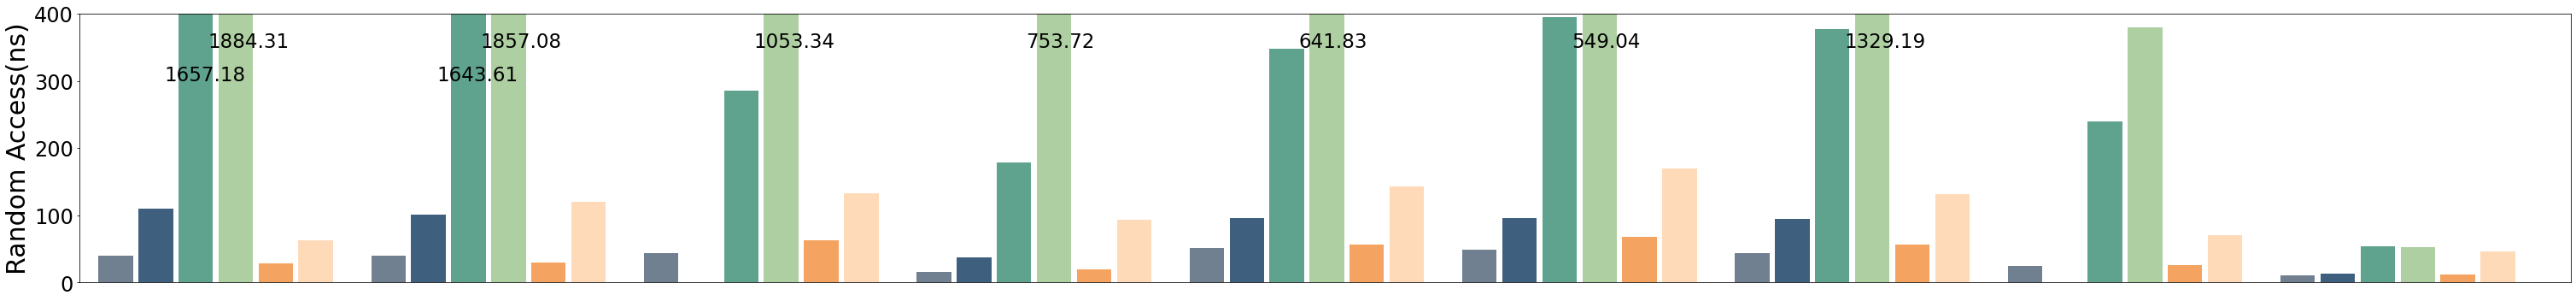

In [130]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64','movieid.txt','house_price.txt']
label = ['linear','normal','poisson','timestamp','books','fb','wiki','movieid','house_price']
data = process_plot_data(plot_dataset, methods, total,'ra_ns')
data = np.array(data)
for i in range(len(data)):
    data[i][0] = Decimal(data[i][0]).quantize(Decimal("0.00"))
data.resize([len(methods),len(plot_dataset)])
create_multi_bars(label, data, bar_gap=0.03)

# Compression Rate

In [131]:
def create_multi_bars_cr(labels, datas, tick_step=1.5, group_gap=0.18, bar_gap=0):
    codec = ['FOR','Elias-Fano','Delta-fix','Delta-var','LeCo-fix','LeCo-var']
#     category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(datas)))
    category_colors = ['slategray','lightseagreen','seagreen','darkseagreen','sandybrown','peachpuff']
    category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2 
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(46.5, 5.5))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y[0], bar_width, label=codec[index], color = category_colors[index] )
        plt.bar(baseline_x + index*bar_span, y[1], bar_width, bottom = y[0], hatch='xxx', color = category_colors[index])
#     for i in range(len(labels)):
#         plt.axhline(y=datas[-1][0][i], xmin= xhline_ind*i-0.16, xmax=xhline_ind*(i+1)-0.16, c="grey", ls="--", lw=1.5)
    plt.ylim([0, max(datas[0][0])+2])
    plt.bar(0, 0, bar_width, bottom = 0, color = 'white',hatch='xxx',label = 'model size')
    for i in range(len(codec)):
            for j in range(len(labels)):
                if datas[i][0][j]+datas[i][1][j] > max(datas[0][0])+2:
                    plt.text(baseline_x[j] + i*bar_span - bar_span/2-0.05, max(datas[0][0])-2, str(datas[i][0][j]+datas[i][1][j]),fontsize = 26)
    
    
#     plt.bar(baseline_x + bar_span, 0, bar_width, color ='grey', label = 'model size')
    plt.ylabel('Compression Ratio(%)',fontsize=30)
    plt.legend(fontsize=28,ncol=7,bbox_to_anchor=(0.56,1.03),borderaxespad = 0.)
    ax = plt.gca()
    ymajorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.yticks(fontsize=30)
#     plt.xticks(ticks, labels, fontsize=30)
    plt.xticks([])
    plt.tight_layout()
    plt.savefig('CR_total.pdf',dpi=500, transparent=True)
    plt.show()
    

In [132]:
def process_cr(plot_dataset,methods,total):
    cr_delta = process_plot_data(plot_dataset, methods, total,['cr_delta'])
    cr_model = process_plot_data(plot_dataset, methods, total,['cr_model'])
    cr_array = np.array(cr_delta)
    cr_array.resize([len(methods),len(plot_dataset)])
    cr_array_model = np.array(cr_model)
    cr_array_model.resize([len(methods),len(plot_dataset)])
    total_cr = []
    for i in range(len(methods)):
        pair = [list(cr_array[i]),list(cr_array_model[i])]
        total_cr.append(pair)
    return total_cr

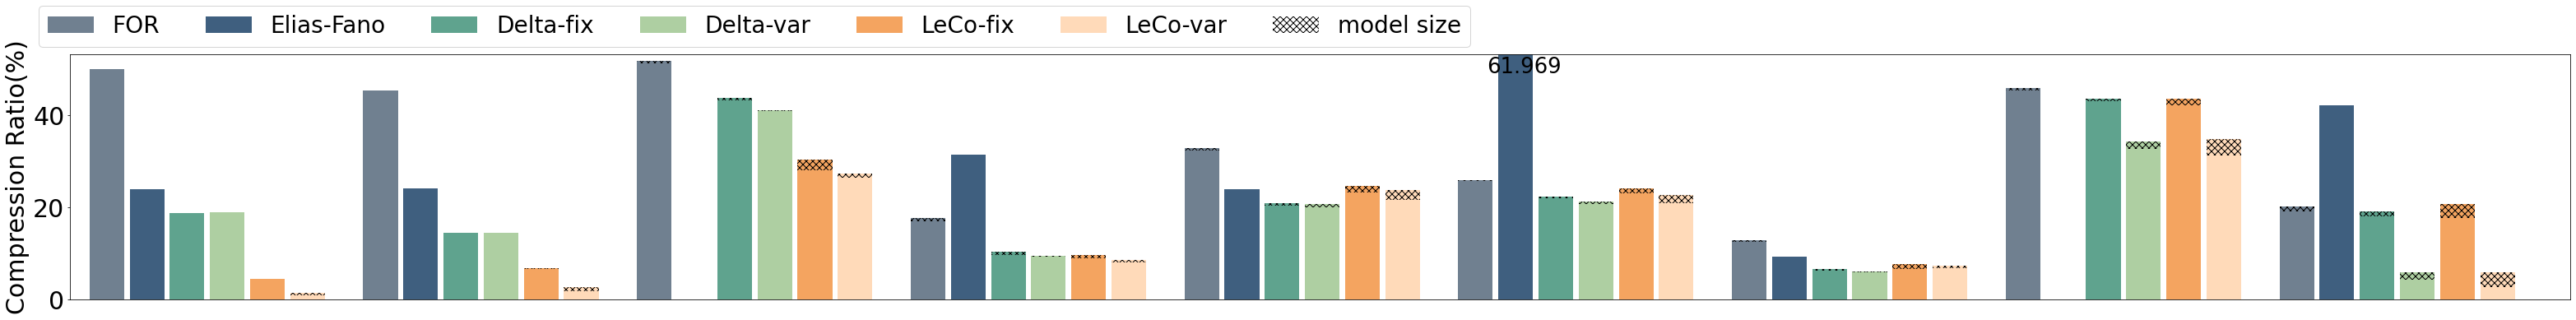

In [133]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64','movieid.txt','house_price.txt']
label = ['linear','normal','poisson','timestamp','books','fb','wiki','movieid','house_price']
total_cr =  process_cr(plot_dataset,methods,total)
create_multi_bars_cr(label, total_cr, bar_gap=0.03)

# Decompression Throughput

In [134]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['FOR','Elias-Fano','Delta','Delta_cost','Leco','Leco_cost']
#     category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data)))
    category_colors = ['slategray','lightseagreen','seagreen','darkseagreen','sandybrown','peachpuff']
    category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    plt.figure(figsize=(42, 5))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
        for i in range(len(y)):
            if np.array(y)[i]>4:
                plt.text(baseline_x[i] + index*bar_span -0.12,3.5, str(np.array(y)[i]),fontsize = 25)
    
    plt.ylabel('Decode TPS(GB/s)',fontsize=34)
#     plt.legend(fontsize=20)
    plt.ylim([0,4])
    ax = plt.gca()
    ymajorLocator = MultipleLocator(1.0)
    ax.yaxis.set_major_locator(ymajorLocator)
    ymajorFormatter = FormatStrFormatter('%1.1f')
    ax.yaxis.set_major_formatter(ymajorFormatter)
#     ax.yaxis.tick_right()
    plt.xlim([min(baseline_x)-0.2, max(baseline_x)+1.5])
    plt.yticks(fontsize=28)
    plt.xticks(ticks, labels, fontsize=40)
    plt.tight_layout()
    plt.savefig('DT_total.pdf',dpi=500, transparent=True)
    plt.show()


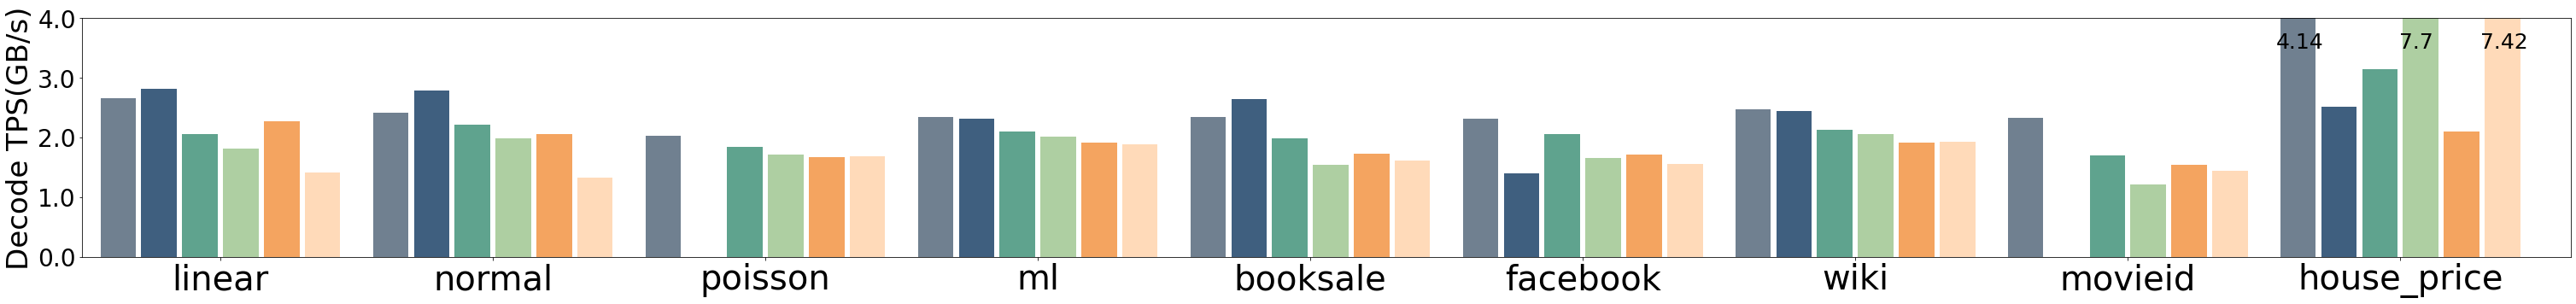

In [135]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64','movieid.txt','house_price.txt']
label = ['linear','normal','poisson','ml','booksale','facebook','wiki','movieid','house_price']
data = process_plot_data(plot_dataset, methods, total,'da_ns')
for i in range(len(data)):
    if float(data[i])>=0.01:
        data[i] = 4 / data[i]
data = np.array(data)
for i in range(len(data)):
    data[i][0] = Decimal(data[i][0]).quantize(Decimal("0.00"))
data.resize([len(methods),len(plot_dataset)])
create_multi_bars(label, data, bar_gap=0.03)

In [32]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64','movieid.txt','house_price.txt']
label = ['linear','normal','poisson','timestamp','books','facebook','wiki','movieid','house_price']
data = process_plot_data(plot_dataset, ['leco_cost','piecewise_fix_op_max','FOR_my','Elias-Fano'], total,'da_ns')
for i in range(len(data)):
    if float(data[i])>=0.01:
        data[i] = 4 / data[i]
data = np.array(data)
for i in range(len(data)):
    data[i][0] = Decimal(data[i][0]).quantize(Decimal("0.00"))
data.resize([4,len(plot_dataset)])
dt_thr = []
for i in range(len(plot_dataset)):
    dt_thr.append(( max(data[2][i],data[3][i]) - max(data[1][i], data[1][i])) / max(data[2][i],data[3][i]))
dt_thr
    

[0.1914893617021277,
 0.26164874551971323,
 0.17733990147783246,
 0.1829787234042554,
 0.3446969696969697,
 0.26293103448275856,
 0.22267206477732804,
 0.33905579399141633,
 0.4927536231884057]

## LP

In [2]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['Leco_fix','Leco_fix_lp','Leco_cost','Leco_cost_lp']
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.6, 0.9, len(codec)))
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(18, 6))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
    for i in range(len(labels)):
        plt.axhline(y=datas[1][i], xmin= xhline_ind*i+0.04, xmax=xhline_ind*(i+0.55)+0.04, c="grey", ls="--", lw=1.5)
        plt.axhline(y=datas[-1][i], xmin= xhline_ind*(i+0.52)+0.03, xmax=xhline_ind*(i+1)+0.04, c="grey", ls="--", lw=1.5)
    
    plt.ylabel('Compression Rate(%)',fontsize=28)
    plt.legend(fontsize=20)
    plt.yticks(fontsize=18)
    plt.xticks(ticks, labels, fontsize=25)
    plt.show()


In [5]:
datasets = ['facebook','newman','house_price','movieid']
leco_fix_cr = [41.0356, 7.06652, 20.7375, 43.6836]
leco_fix_lp_cr = [40.6522, 6.77908, 19.7018, 43.4306]
leco_auto_cr = [39.1315, 3.71019, 5.78325, 34.7282]
leco_auto_lp_cr = [38.6585, 3.41695, 4.295, 33.2288]

In [12]:
# create_multi_bars(datasets, [leco_fix_cr,leco_fix_lp_cr, leco_auto_cr, leco_auto_lp_cr], bar_gap=0.03)

In [3]:
enhancement_lp =[]
for i in range(len(leco_fix_cr)):
    enhancement_lp.append(100.0 * (leco_fix_cr[i] - leco_fix_lp_cr[i])/ leco_fix_cr[i])
enhancement_lp

[0.9343106960785311, 4.067631592353793, 4.994333936106098, 0.57916472085634]

In [6]:
enhancement_lp =[]
for i in range(len(leco_fix_cr)):
    enhancement_lp.append(100.0 * (leco_auto_cr[i] - leco_auto_lp_cr[i])/ leco_auto_cr[i])
enhancement_lp

[1.208744873056249, 7.9036383581433824, 25.733800198850126, 4.31752869426]

## DP

In [13]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['Leco_cost','Leco_dp']
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.6, 0.9, len(codec)))
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    xhline_ind = 0.92 / len(labels)
    plt.figure(figsize=(10, 6))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
    for i in range(len(labels)):
        plt.axhline(y=datas[1][i], xmin= xhline_ind*i+0.04, xmax=xhline_ind*(i+0.55)+0.04, c="grey", ls="--", lw=1.5)
        plt.axhline(y=datas[-1][i], xmin= xhline_ind*(i+0.52)+0.03, xmax=xhline_ind*(i+1)+0.04, c="grey", ls="--", lw=1.5)
    
    plt.ylabel('Compression Rate(%)',fontsize=28)
    plt.legend(fontsize=20)
    plt.yticks(fontsize=18)
    plt.xticks(ticks, labels, fontsize=25)
    plt.show()
datasets = ['facebook','house_price','movieid']
leco_cost_cr = [39.1315, 5.812, 34.7282]
leco_fix_dp_cr = [38.61, 5.791, 33.689]
# create_multi_bars(datasets, [leco_cost_cr,leco_fix_dp_cr], bar_gap=0.03)


In [10]:
enhancement_dp =[]
for i in range(len(leco_cost_cr)):
    enhancement_dp.append(100.0 * (leco_cost_cr[i] - leco_fix_dp_cr[i])/ leco_cost_cr[i])
enhancement_dp

[1.3326859435493226, 0.3613214039917396, 2.9923808317160145]

# Compression Throughput

In [76]:
fix_method  = ['FOR_my','Elias-Fano','delta_my','delta_cost','piecewise_fix_op_max','leco_cost']
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt','poisson_randomdie.txt','ml_timestamp.txt','books_200M_uint32.txt','fb_200M_uint64','wiki_200M_uint64']
size = [200000000, 200000000,100000000, 14057565, 200000000, 200000000, 200000000]
# portion = size / sum(size)
avg_compression_throughput = []
for codec in fix_method:
    test = total.loc[total['method'] == codec]
    test = test.loc[test['dataset'].isin(plot_dataset)]
    data_cols = np.array(test['compression_throughput'])
    avg_speed = 0
    for i in range(len(data_cols)):
        avg_speed += (size[i]/sum(size))*data_cols[i]
    avg_compression_throughput.append(avg_speed)
avg_compression_throughput

[0.84057092687127,
 0.5369375596400353,
 1.0106271303853136,
 0.04691196174215737,
 0.7588956141597584,
 0.021636420296364575]

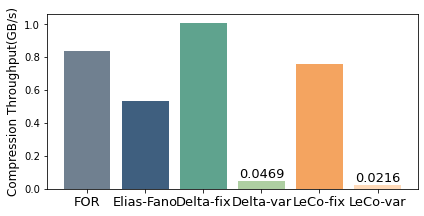

In [136]:
method_name = ['FOR','Elias-Fano','Delta-fix','Delta-var','LeCo-fix','LeCo-var']
category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'gold','lemonchiffon']
category_colors = ['slategray',color_sns[5],color_sns[3],color_sns[1],'sandybrown','peachpuff']
plt.figure(figsize=(6, 3))
plt.bar(method_name,avg_compression_throughput,color = category_colors)
plt.xticks(fontsize=13)
plt.ylabel('Compression Throughput(GB/s)',fontsize=12)
for i in range(len(method_name)):
    if avg_compression_throughput[i]<0.1:
        plt.text(method_name[i], avg_compression_throughput[i], str(Decimal(avg_compression_throughput[i]).quantize(Decimal("0.0000"))),fontsize = 13,ha='center', 
             va='bottom',)
# plt.axhline(y=avg_compression_throughput[-1], c="grey", ls="--", lw=2)
plt.tight_layout()
plt.savefig('CT_new.pdf',dpi=500, transparent=True)


# Partition(Leco+FITing v.s. Leco_cost)

In [139]:
Leco_fit = pd.read_csv(base_path+'/benchmark/piecewise_fiting_bench.log')

In [140]:
plot_dataset = ['normal_200M_uint32.txt','books_200M_uint32.txt','movieid.txt','house_price.txt']
label = ['normal','booksale','movieid','house_price']
Leco_cost_cr =  process_plot_data(plot_dataset,['leco_cost'],auto_int, 'cr')
Leco_cost_cr = np.array(Leco_cost_cr).flatten()
Leco_cost_cr

array([ 2.56578, 23.6758 , 34.8087 ,  5.78325])

In [141]:
plot_dataset = ['normal_200M_uint32.txt','books_200M_uint32.txt','movieid.txt','house_price.txt']
label = ['normal','booksale','movieid','house_price']
Leco_fix_cr =  process_plot_data(plot_dataset,['piecewise_fix_op_max'],fix_int, 'cr')
Leco_fix_cr = np.array(Leco_fix_cr).flatten()

In [142]:
Leco_fix_cr

array([ 6.70318, 24.6288 , 43.6836 , 20.7375 ])

In [143]:
Leco_fiting_cr = process_plot_data(plot_dataset,['piecewise_fiting'],Leco_fit, 'cr')
Leco_fiting_cr = np.array(Leco_fiting_cr).flatten()
Leco_fiting_cr

array([21.1009, 27.663 , 43.0724,  6.305 ])

In [156]:
def create_multi_bars(labels, datas, tick_step=1.5, group_gap=0.15, bar_gap=0):
    codec = ['LeCo-fix','LeCo-FITing','LeCo-var']
#     category_colors = ['sandybrown',color_sns[0],'peachpuff']
    category_colors = [[0.8423298817793848, 0.8737404427964184, 0.7524954030731037],[0.3720866446574984, 0.6378633419526029, 0.5550368905837924],[0.24670155725826665, 0.37340824813905654, 0.49725690696587516]]
    ticks = np.arange(len(labels)) * tick_step
    group_num = len(datas)
    group_width = tick_step - group_gap
    bar_span = group_width / group_num
    bar_width = bar_span - bar_gap
    baseline_x = ticks - (group_width - bar_span) / 2
    plt.figure(figsize=(6, 3))
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, label =codec[index],color = category_colors[index] )
    plt.ylabel('Compression Rate(%)',fontsize=15)
    plt.legend(fontsize=13)
    plt.yticks(fontsize=14)
    plt.xticks(ticks, labels, fontsize=17)
    plt.tight_layout()
    plt.savefig('partition_cost_Fiting.pdf',dpi=500, transparent=True)
    plt.show()


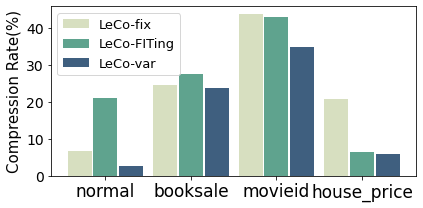

In [157]:
create_multi_bars(label, [Leco_fix_cr,Leco_fiting_cr, Leco_cost_cr], bar_gap=0.03)

## Fix length partitioning

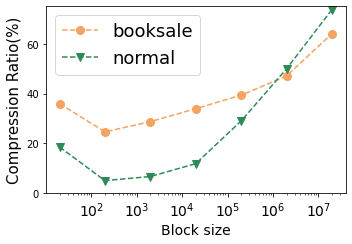

In [103]:
normal = [
    18.5524,
    5.05246,
    6.70318,
    11.8552,
    29.0333,
    49.9377,
    73.75,
    
]
books=[
    35.9475,
    24.6288,
    28.7349,
    33.9434,
    39.3645,
    47.0627,
    64.0625, 
    
]

label = ['booksale','normal']
dataset = [books, normal, ]
mark_style = ['o','v']
colors = ['sandybrown','seagreen']
plt.figure(figsize=(5, 3.5))
for i in range(len(dataset)):
    plt.plot([20,200,2000,20000,200000,2000000,20000000],dataset[i],ls='--',marker=mark_style[i],label = label[i], c = colors[i],ms=8)

plt.ylabel('Compression Ratio(%)',fontsize=15)
plt.xlabel('Block size',fontsize=14)
plt.ylim([0,75])
# plt.xticks([1,2,3,4,5,6,7],[20,200,2000,20000,200000,2000000,20000000])
ax = plt.gca()
ymajorLocator = MultipleLocator(20)
ax.yaxis.set_major_locator(ymajorLocator)
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='x')
ax.set_xscale('log')
plt.xticks(fontsize=14)
plt.legend(fontsize=18)
# plt.show()
plt.tight_layout()
plt.savefig('fix_partition_Ushape.pdf',dpi=500, transparent=True)


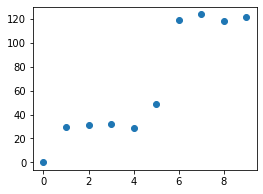

In [12]:
v = [0,30,31,32,29,49,119,124,118,122]
x = [i for i in range(len(v))]
plt.figure(figsize=(4, 3))
plt.scatter(x,v)

## hyper-parameter search

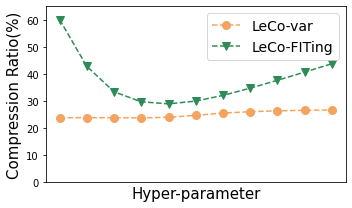

In [357]:
leco_cost = [
    23.7643,
    23.7643,
    23.7643,
    23.6758,
    23.9237,
    24.6197,
    25.4671,
    25.974,
    26.3053,
    26.4933,
    26.6175
]
leco_fiting=[
    60.1165,
    42.7799,
    33.3731,
    29.6517,
    28.8748,
    29.9143,
    32.0348,
    34.702,
    37.6265,
    40.6707,
    43.7648
]
label = ['LeCo-var','LeCo-FITing']
dataset = [leco_cost, leco_fiting]
mark_style = ['o','v']
colors = ['sandybrown','seagreen']
plt.figure(figsize=(5, 3))
for i in range(len(dataset)):
    plt.plot(dataset[i],ls='--',marker=mark_style[i],label = label[i], c = colors[i],ms=8)

plt.ylabel('Compression Ratio(%)',fontsize=15)
plt.xlabel('Hyper-parameter',fontsize=15)
# plt.title('Rocksdb index block',fontsize=23)
plt.ylim([0,65])
plt.xticks([])
plt.legend(fontsize=14)
# ax = plt.gca()
# ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.tight_layout()
plt.savefig('tau_search.pdf',dpi=500, transparent=True)
plt.show()


# Data Distribution

In [28]:
def data_distribution(data,name, box_pos,length=100):
    index = [i for i in range(len(data))]
    N = len(index)
    
    fig, ax = plt.subplots(1, 1,figsize=(5, 4.5))
    ax.plot(index, data, linewidth=3)

    axins = ax.inset_axes(box_pos)
    axins.plot(index, data, color='#4169E1',linewidth=2.5)


    # 设置放大区间  对应横坐标
    zone_left = int(N * 0.2)
    zone_right = int(N * 0.2)+length


    # 坐标轴的扩展比例（根据实际数据调整）
    x_ratio = 0 
    y_ratio = 0.05  

    # X轴的显示范围
    xlim0 = index[zone_left]-(index[zone_right]-index[zone_left])*x_ratio
    xlim1 = index[zone_right]+(index[zone_right]-index[zone_left])*x_ratio

    # Y轴的显示范围
    y = np.hstack((data[zone_left:zone_right], data[zone_left:zone_right],))
    ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
    ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio


    axins.set_xlim(xlim0, xlim1)
    axins.set_ylim(ylim0, ylim1)
    axins.set_xticks([])
    axins.set_yticks([])


    ax.set_xticks([0,max(index)+1])
    ax.set_yticks([0,max(data)+1])

    # 原图中画方框
    tx0 = xlim0
    tx1 = xlim1
    ty0 = ylim0
    ty1 = ylim1
    sx = [tx0,tx1,tx1,tx0,tx0]
    sy = [ty0,ty0,ty1,ty1,ty0]
    ax.plot(sx,sy,"black")

    # 画两条线
    xy = (xlim0,ylim0)
    xy2 = (xlim0,ylim0)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)

    xy = (xlim1,ylim0)
    xy2 = (xlim0,ylim1)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)
    plt.title(name, fontsize= 40)
    plt.tight_layout()
    plt.savefig('distribution'+str(name)+'.pdf',dpi=500, transparent=True)

    plt.show()


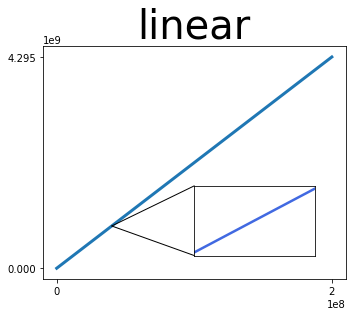

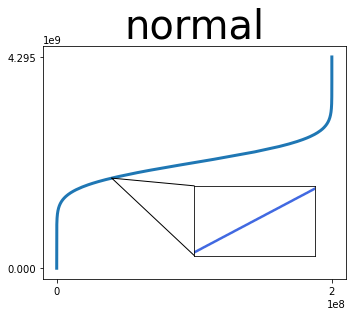

In [29]:
plot_dataset = ['linear_200M_uint32.txt','normal_200M_uint32.txt']
data_name = ['linear','normal']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/integer_data/'+name
    ff = open(dataset,'r')
    data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.5, 0.1, 0.4, 0.3))


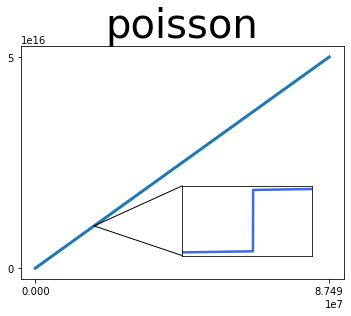

In [30]:
plot_dataset = ['poisson_randomdie.txt']
data_name = ['poisson']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/integer_data/'+name
    ff = open(dataset,'r')
    data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.5, 0.1, 0.4, 0.3),1600)


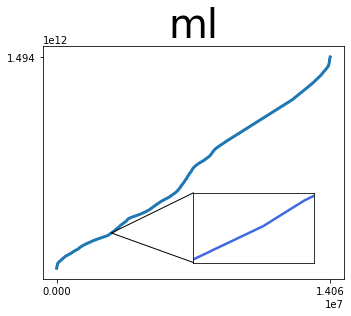

In [31]:
plot_dataset = ['ml_timestamp.txt']
data_name = ['ml']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/integer_data/'+name
    ff = open(dataset,'r')
    data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.5, 0.07, 0.4, 0.3),1600)


In [20]:
def data_distribution(data,name, box_pos, length=100):
    index = [i for i in range(len(data))]
    N = len(index)
    fig, ax = plt.subplots(1, 1,figsize=(5, 4.5))
    ax.plot(index, data,linewidth=3)

    axins = ax.inset_axes(box_pos)
    axins.plot(index, data, color='#4169E1',linewidth=2.5)


    # 设置放大区间  对应横坐标
    zone_left = int(N * 0.2)
    zone_right = int(N * 0.2)+length


    # 坐标轴的扩展比例（根据实际数据调整）
    x_ratio = 0 
    y_ratio = 0.05  

    # X轴的显示范围
    xlim0 = index[zone_left]-(index[zone_right]-index[zone_left])*x_ratio
    xlim1 = index[zone_right]+(index[zone_right]-index[zone_left])*x_ratio

    # Y轴的显示范围
    y = np.hstack((data[zone_left:zone_right], data[zone_left:zone_right],))
    ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
    ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio


    axins.set_xlim(xlim0, xlim1)
    axins.set_ylim(ylim0, ylim1)
    axins.set_xticks([])
    axins.set_yticks([])


    ax.set_xticks([0,max(index)+1])
    ax.set_yticks([0,max(data)+1])

    # 原图中画方框
    tx0 = xlim0
    tx1 = xlim1
    ty0 = ylim0
    ty1 = ylim1
    sx = [tx0,tx1,tx1,tx0,tx0]
    sy = [ty0,ty0,ty1,ty1,ty0]
    ax.plot(sx,sy,"black")

    # 画两条线
    xy = (xlim0,ylim0)
    xy2 = (xlim0,ylim0)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)

    xy = (xlim1,ylim0)
    xy2 = (xlim1,ylim0)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)
    plt.title(name, fontsize= 40)
    plt.tight_layout()
    plt.savefig('distribution'+str(name)+'.pdf',dpi=500, transparent=True)

    plt.show()


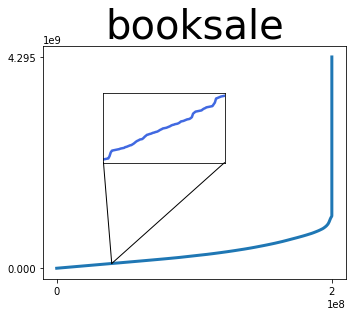

In [21]:
# plot_dataset = ['house_price.txt','books_200M_uint32.txt']
# data_name = ['house_price','booksale']
plot_dataset = ['books_200M_uint32.txt']
data_name = ['booksale']
for i in range(len(plot_dataset)):
    name = plot_dataset[i]
    dataset = base_path+'/integer_data/'+name
    ff = open(dataset,'r')
    data = [int(item[:-1]) for item in ff.readlines()]
    data_distribution(data,data_name[i],(0.2, 0.5, 0.4, 0.3))


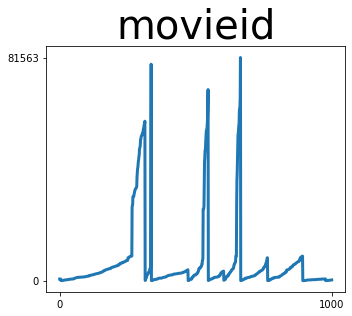

In [34]:
plot_dataset = 'movieid.txt'
data_name = 'movieid'
dataset = base_path+'/integer_data/'+plot_dataset
ff = open(dataset,'r')
data = [int(item[:-1]) for item in ff.readlines()]
N = len(data)
plot_data = data[int(N*0.2):int(N*0.2)+1000]
index = [i for i in range(len(plot_data))]
plt.figure( figsize=(5, 4.5) )
plt.plot(index, plot_data,linewidth=3)

plt.xticks([0,max(index)+1])
plt.yticks([0,max(plot_data)+1])
plt.title(data_name, fontsize= 40)
plt.tight_layout()
plt.savefig('distributionmovieid.pdf',dpi=500, transparent=True)

plt.show()


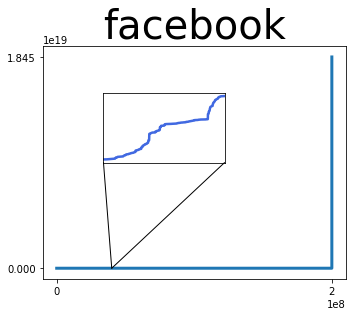

In [35]:
import numpy as np

f = open(base_path+'/integer_data/fb_200M_uint64', "r")
data = np.fromfile(f, dtype=np.uint64)[1:]

data_distribution(data,'facebook',(0.2, 0.5, 0.4, 0.3),2000)

In [36]:
def data_distribution(data,name, box_pos,length=100):
    index = [i for i in range(len(data))]
    N = len(index)
    
    fig, ax = plt.subplots(1, 1,figsize=(5, 4.5))
    ax.plot(index, data, linewidth=3)

    axins = ax.inset_axes(box_pos)
    axins.plot(index, data, color='#4169E1',linewidth=2.5)


    # 设置放大区间  对应横坐标
    zone_left = int(N * 0.2)
    zone_right = int(N * 0.2)+length


    # 坐标轴的扩展比例（根据实际数据调整）
    x_ratio = 0 
    y_ratio = 0.05  

    # X轴的显示范围
    xlim0 = index[zone_left]-(index[zone_right]-index[zone_left])*x_ratio
    xlim1 = index[zone_right]+(index[zone_right]-index[zone_left])*x_ratio

    # Y轴的显示范围
    y = np.hstack((data[zone_left:zone_right], data[zone_left:zone_right],))
    ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
    ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio


    axins.set_xlim(xlim0, xlim1)
    axins.set_ylim(ylim0, ylim1)
    axins.set_xticks([])
    axins.set_yticks([])


    ax.set_xticks([0,max(index)+1])
    ax.set_yticks([0,max(data)+1])

    # 原图中画方框
    tx0 = xlim0
    tx1 = xlim1
    ty0 = ylim0
    ty1 = ylim1
    sx = [tx0,tx1,tx1,tx0,tx0]
    sy = [ty0,ty0,ty1,ty1,ty0]
    ax.plot(sx,sy,"black")

    # 画两条线
    xy = (xlim0,ylim1)
    xy2 = (xlim0,ylim1)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)

    xy = (xlim1,ylim1)
    xy2 = (xlim1,ylim1)
    con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
            axesA=axins,axesB=ax)
    axins.add_artist(con)
    plt.title(name, fontsize= 40)
    plt.tight_layout()
    plt.savefig('distribution'+str(name)+'.pdf',dpi=500, transparent=True)

    plt.show()


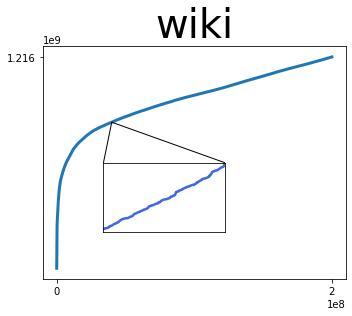

In [37]:
    
import numpy as np

f = open(base_path+'/integer_data/wiki_200M_uint64', "r")
data = np.fromfile(f, dtype=np.uint64)[1:]

data_distribution(data,'wiki',(0.2, 0.2, 0.4, 0.3),200)

# movieid

In [42]:
ff = open(base_path+'/integer_data/movieid.txt','r')
df = [int(item[:-1]) for item in ff.readlines()]

In [43]:
min_idx= 959
max_idx = 2000

In [45]:
piecewise= []
piecewise_idx = []
with open('movieid_segments.log','r')as f:
    l = f.readlines()
    for item in l:
        item= item[:-1]
        item = item.split(' ')
#         print(item)
        if int(item[0])< min_idx:
            continue
        if int(item[1])>max_idx:
            break
        last = float(item[2]) + (int(item[1])-int(item[0]))*float(item[3])
                            
        piecewise.append([int(float(item[2])),int(last)])
        piecewise_idx.append([int(item[0])+1,int(item[1])+1])

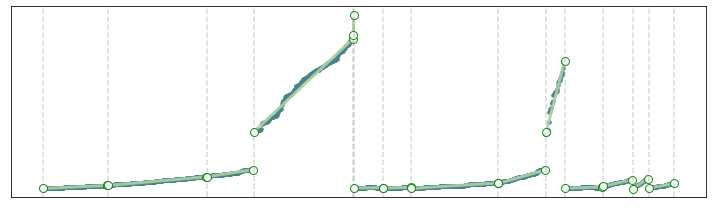

In [52]:
max_idx = piecewise_idx[-1][1]
groundtruth = df[min_idx:max_idx]
index = [i for i in range(min_idx, max_idx)]
plt.figure(figsize=(10, 3))
plt.scatter(index,groundtruth, s=12, color=color_sns[4])
for i in range(len(piecewise)):
    if piecewise_idx[i][0]==173:
        continue
#     if piecewise_idx[i][0]==1461:
#         continue
    plt.axvline(piecewise_idx[i][0],linestyle = "--", color = 'grey', alpha=0.3)
    plt.plot(piecewise_idx[i],piecewise[i],color = color_sns[1],linewidth=3, alpha=0.9,marker='o',mec='g',ms=8, mfc='w')
#     plt.scatter(piecewise_idx[i][0],piecewise[i][0], marker='o', color =  color_sns[6], s=12,edgecolors=color_sns[6])
#     plt.scatter(piecewise_idx[i][1],piecewise[i][1], marker='o',color =  color_sns[3], s=12,edgecolors='grey')
plt.axvline(piecewise_idx[-1][1],linestyle = "--", color = 'grey', alpha=0.3)
# plt.title('Movie ID', fontsize=20)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig('movieid_adaptive.pdf',dpi=500, transparent=True)
plt.show()

In [10]:
ff = open(base_path+'/integer_data/movieid.txt','r')
df = [int(item[:-1]) for item in ff.readlines()]
min_idx= 1000
max_idx = 2000
piecewise= []
piecewise_idx = []
with open('movieid_segment_fix.log','r')as f:
    l = f.readlines()
    for item in l:
        item= item[:-1]
        item = item.split(' ')
        if int(item[0])< min_idx:
            continue
        if int(item[1])>max_idx:
            break
        last = float(item[2]) + (int(item[1])-int(item[0]))*float(item[3])
                            
        piecewise.append([int(float(item[2])),int(last)])
        piecewise_idx.append([int(item[0]),int(item[1])])

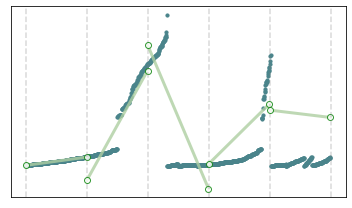

In [11]:
groundtruth = df[min_idx:max_idx]
index = [i for i in range(min_idx, max_idx)]
plt.figure(figsize=(5, 3))
plt.scatter(index,groundtruth, s=10, color= color_sns[4])


for i in range(len(piecewise)):
    if piecewise_idx[i][0]==173:
        continue
    
    plt.axvline(piecewise_idx[i][0],linestyle = "--", color = 'grey', alpha=0.3)
    plt.plot(piecewise_idx[i],piecewise[i],color = color_sns[1],linewidth=3, alpha=0.8,marker='o',mec='g',ms=6, mfc='w')
#     plt.scatter(piecewise_idx[i][0],piecewise[i][0], marker='o', color =  color_sns[3], s=12,edgecolors='g')
#     plt.scatter(piecewise_idx[i][1],piecewise[i][1], marker='o',color =  color_sns[3], s=12,edgecolors='g')
# plt.title('Movie ID', fontsize=20)
plt.axvline(max_idx,linestyle = "--", color = 'grey', alpha=0.3)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig('movieid_fix.pdf',dpi=500, transparent=True)

plt.show()

## case study

In [43]:
def lr(x, y, m):
    sumx = 0
    sumy = 0
    sumxy = 0
    sumxx = 0
    for i in range(m):
        sumx = sumx + x[i]
        sumy = sumy + y[i]
        sumxx = sumxx+x[i]*x[i]
        sumxy = sumxy+x[i]*y[i]
    
    ccc= sumxy * m - sumx * sumy
    xxx = sumxx * m - sumx * sumx

    theta1 = ccc/xxx
    theta0 = (sumy - theta1 * sumx)/m
    return theta0, theta1
    

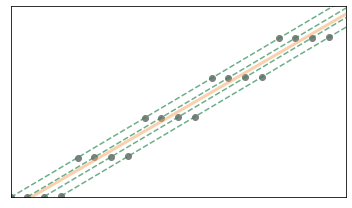

In [73]:
outer_gap = 5000
inner_gap = 50
start = 0
data = []
step = 7
group = 4
plt.figure(figsize=(5, 3))
for i in range(step):
    for j in range(group):
        data.append(start)
        start+= inner_gap
    start+=outer_gap
index = [i for i in range(len(data))]
for i in range(group):
    plt.plot([i,group*(step - 1)+i],[data[i], data[group*(step - 1)+i]],linestyle = '--', color = 'seagreen', alpha=0.7 )
lr_theta0, lr_theta1 = lr(index, data, step*group)
plt.plot([0, step*group-1],[lr_theta0, lr_theta0+lr_theta1*(step*group-1)], color = 'sandybrown', alpha=0.5,linewidth=3, label = 'Default')
plt.xlim([0,20])
plt.ylim([0,25000])
plt.yticks([])
plt.xticks([])
plt.scatter(index,data,color = 'grey') 
plt.tight_layout()
plt.savefig('step_wise.pdf',dpi=500, transparent=True)

